El hallazgo de hiperparámetros adecuados es crucial para mejorar el rendimiento y la generalización de los modelos de aprendizaje automático. Existen varios métodos descritos en la literatura moderna que pueden ayudar a encontrar los hiperparámetros que mejor se ajustan. El rendimiento se prueba en diferentes conjuntos de datos que se prueban y se estudian bien, como MINST. Los hiperparámetros (HP) son externos al proceso de aprendizaje, pero afectan significativamente el rendimiento del modelo. Los HP son externos al proceso de aprendizaje, pero afectan significativamente el rendimiento del modelo. Un ajuste efectivo generalmente requiere experiencia en el dominio o métodos computacionalmente costosos como la búsqueda de fuerza bruta. Un ajuste efectivo generalmente requiere experiencia en el dominio o métodos computacionalmente costosos como la búsqueda de fuerza bruta En [1, 2, 3], se explora la optimización bayesiana. La optimización bayesiana aprovecha el conocimiento previo para actualizar las distribuciones posteriores en función de los datos de muestra, lo que guía la búsqueda de configuraciones óptimas de hiperparámetros de manera eficiente. Los enfoques tradicionales como la búsqueda en cuadrícula y la búsqueda aleatoria son computacionalmente costosos y menos efectivos en espacios de alta dimensión. La optimización bayesiana ofrece una alternativa más eficiente, particularmente para funciones objetivo de caja negra costosas. 

En [1] se explora el uso de la optimización bayesiana para ajustar los hiperparámetros en los modelos de aprendizaje automático, lo que es fundamental para mejorar el rendimiento del modelo. El estudio propone un método que utiliza la optimización bayesiana con procesos gaussianos. Los enfoques tradicionales, como la búsqueda en cuadrícula y la búsqueda aleatoria, son computacionalmente costosos y menos efectivos en espacios de alta dimensión. La optimización bayesiana ofrece una alternativa más eficiente, particularmente para funciones objetivo de caja negra costosas. Los resultados se realizaron en modelos de aprendizaje automático como bosques aleatorios, redes neuronales (CNN y RNN) y bosques profundos (gcForest). La optimización bayesiana demostró mejoras significativas en la precisión de la predicción y la eficiencia computacional en comparación con los métodos tradicionales. Los resultados confirman que la optimización bayesiana supera a otras técnicas de optimización en términos de velocidad y logro de un mejor rendimiento del modelo, especialmente en escenarios con recursos computacionales limitados o espacios de hiperparámetros de alta dimensión.

En [2] se afirma que los modelos complejos como las redes de creencias profundas (DBN) tienen numerosos hiperparámetros, lo que hace que la optimización manual sea ineficiente e inconsistente. La dificultad para ajustar estos modelos obstaculiza la reproducibilidad y el progreso en la investigación del aprendizaje automático. Por lo tanto, los enfoques propuestos se basan en la Búsqueda aleatoria, un método en el que los hiperparámetros se muestrean aleatoriamente a partir de distribuciones predefinidas. Es eficiente para problemas simples, pero tiene dificultades con modelos complejos como las DBN. Para mejorar esta desventaja, se presenta la Optimización basada en modelos secuenciales. Este método aproxima la función de pérdida con un modelo sustituto para guiar la búsqueda. Se explican dos variantes específicas de los métodos: el proceso gaussiano y el estimador Parzen estructurado en árbol. Ambos métodos se probaron en DBN con hasta 32 hiperparámetros en tareas como la clasificación de imágenes en conjuntos de datos como MNIST y MRBI. Los resultados muestran que la búsqueda aleatoria coincidió con la optimización manual humana para tareas simples, pero falló para conjuntos de datos más difíciles. El estimador Parzen estructurado en árbol superó consistentemente tanto la búsqueda aleatoria como el ajuste manual, logrando una mejor precisión y eficiencia. El proceso gaussiano fue efectivo pero menos eficiente que el TPE debido a la sobrecarga computacional.

En [3], los resultados demuestran que se realizaron experimentos en modelos de aprendizaje automático como bosques aleatorios, redes neuronales (CNN y RNN) y bosques profundos (gcForest). La optimización bayesiana demostró mejoras significativas en la precisión de la predicción y la eficiencia computacional en comparación con los métodos tradicionales. Los resultados confirman que la optimización bayesiana supera a otras técnicas de optimización en términos de velocidad y logro de un mejor rendimiento del modelo, especialmente en escenarios con recursos computacionales limitados o espacios de hiperparámetros de alta dimensión.




[1] Hyunghun Cho et al.: *Basic Enhancement Strategies When Using Bayesian Optimization for Hyperparameter Tuning of Deep Neural Networks*, Special section on scalable deeo learning for big data, VOLUME 8, Digital Object Identifier 10.1109/ACCESS.2020.2981072, pp. 52588-52608 IEEE Access, 2020

[2] James Bergstra et al: *Algorithms for Hyper-Parameter Optimization*, NIPS'11: Proceedings of the 24th International Conference on Neural Information Processing Systems,  pp. 2546 - 2554, 2011

[3] Jia Wu et al: *Hyperparameter Optimization for Machine Learning Models Based on Bayesian Optimization*, Journal of Electronic Science , VOL. 17, NO. 1,Digital Object Identifier:10.11989/JEST.1674-862X.80904120, pp.26 - 40, 2019, 

## Preparación de datos y entorno e importación del conjunto de datos MINST
 En este ejemplo, el conjunto de datos MINST se utiliza para aplicar la optimización bayesiana para los hiperparámetros de una red neuronal NN.\ La biblioteca *tensorflow* se utiliza para definir la NN. *Tensorflow* contiene el conjunto de datos MNIST que contiene números escritos a mano en escala de grises del 0 al 9. Todas las imágenes están etiquetadas y, por lo tanto, se puede aplicar una estrategia de entrenamiento supervisada.\ Además, se importa la biblioteca *GPyOpt* para optimizar los hiperparámetros utilizando el *proceso gaussiano*. GPyOpt es una biblioteca de Python para la optimización bayesiana utilizando procesos gaussianos (GP). Está diseñada para ayudar a optimizar funciones costosas de evaluar, especialmente aquellas que no son convexas, ruidosas o de caja negra (donde se desconoce el mecanismo interno de la función). La biblioteca aprovecha los GP para modelar la función objetivo y proporciona métodos eficientes para explorar el espacio de búsqueda.

### Posibles aplicaciones
Un modelo entrenado puede utilizarse para detectar escritura a mano y convertirla en escritura de imprenta estándar. El conjunto de datos debe ampliarse a letras escritas a mano y, tal vez, a caracteres especiales, pero una red neuronal como la utilizada en este proyecto debería gestionar esto fácilmente. Otra aplicación, que también contempla la ampliación de letras, es la detección de matrículas de automóviles en las rutas de tráfico para identificar vehículos que superan los límites de velocidad.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## necessary libraries to build model tensorflow (objective funciton)
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import GPyOpt


## Cargar y preparar el conjunto de datos
 Es necesario cargar el conjunto de datos. El conjunto de datos contiene 70 000 imágenes de números escritos a mano del 0 al 9. Cada imagen es una matriz de 28 x 28 píxeles. Cada píxel puede obtener un valor entre 0 (que corresponde al color negro) y 255 (que corresponde al color blanco). Por lo tanto, los datos de entrada se normalizan dividiéndolos por 255. La señal de salida contiene el número correspondiente del 0 al 9. El conjunto de datos se divide en 60 000 imágenes para entrenar el modelo y 10 000 imágenes para validarlo.

In [3]:
# Load MNIST dataset
# Split into training and testing datasets
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_train.shape

(60000, 28, 28)

Como la salida es una variable categórica, se aplica el método One-Shot con diez categorías o clases, cada una para cada número entre 0 y 9. Los números numéricos deben estar categóricos.

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

La siguiente figura ilustra los datos: los valores X son matrices de 28 x 28 píxeles con un número escrito a mano, los valores Y correspondientes contienen el número.

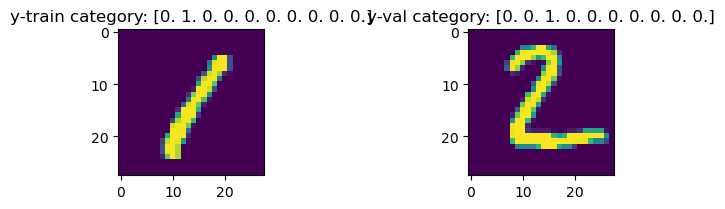

In [5]:
import matplotlib.pyplot as plt
m = X_train.shape
plt.subplot(1,3,1)
plt.imshow(X_train[3])
plt.title("y-train category: " + str(y_train[3]))
plt.subplot(1,3,3)
plt.imshow(X_val[1])
plt.title("y-val category: " + str(y_val[1]))
plt.show()

## Descripción del modelo (La función objetivo)
La siguiente imagen muestra una posible estructura de una red neuronal (NN). La red tiene una capa de entrada. En el caso del conjunto MNIST, las entradas son la imagen 28 x 28. La NN no puede recibir entradas en formato de matriz. Por lo tanto, la matriz se convierte en un vector con 784 elementos (28 x 28). Todas las entradas se envían a la primera capa oculta que contiene una cantidad de neuronas. La salida de estas neuronas son las entradas de la segunda capa con una cantidad definida de neuronas. La cantidad de neuronas de ambas capas no es necesariamente igual. La última capa se denomina capa de salida y debe tener 10 neuronas, una por cada cantidad posible. Cada entrada está conectada a cada neurona de la siguiente capa. Las entradas se multiplican por un peso $w$ y la suma de todas las entradas ponderadas se calcula como la salida de la neurona.
$$
y_{jk} = \sum_{i=1}^N {w_i x_i}
$$
con j el número de capa y k el número de neurona en la capa j La función de activación en cada capa oculta es Unidad Lineal Rectificada (relu) una función lineal para valores mayores o iguales a 0 y 0 para valores negativos. Durante la fase de entrenamiento, la NN se entrena para identificar la interpretación correcta de la imagen. Para ello, la red optimiza los pesos $w_{ik}$ aplicando un método llamado Backpropagation.
### Backpropagation
Los datos de entrada fluyen a través de la red capa por capa, aplicando pesos y sesgos, y activando funciones hasta que se genera la salida. Luego, la función de pérdida compara la salida predicha de la red con el objetivo real (por ejemplo, el error cuadrático medio para la regresión). Luego, se calcula el gradiente de la pérdida con respecto a los pesos y sesgos en la capa de salida utilizando la regla de la cadena del cálculo. Esta es la derivada de la función de pérdida con respecto a las activaciones de la última capa. Los gradientes se propagan hacia atrás desde la salida a las capas de entrada utilizando la regla de la cadena. Para cada neurona, se calcula cuánto contribuyó al error en la siguiente capa. Luego, cada peso $w$ y sesgo $b$ utilizando una regla como el Descenso de gradiente:
$$ 
w = w − η ⋅  \frac{∂w}{∂L} 

$$


​
$$ 
𝑏 = 𝑏 −𝜂⋅\frac{∂𝐿}{∂𝑏} 
$$
- η es el learning rate
- $\frac{∂w}{∂L}$ el gradiente de pérdida con respecto al peso $w$.\ 
Este proceso se repite a lo largo de varias épocas hasta que la función de pérdida mejora significativamente.

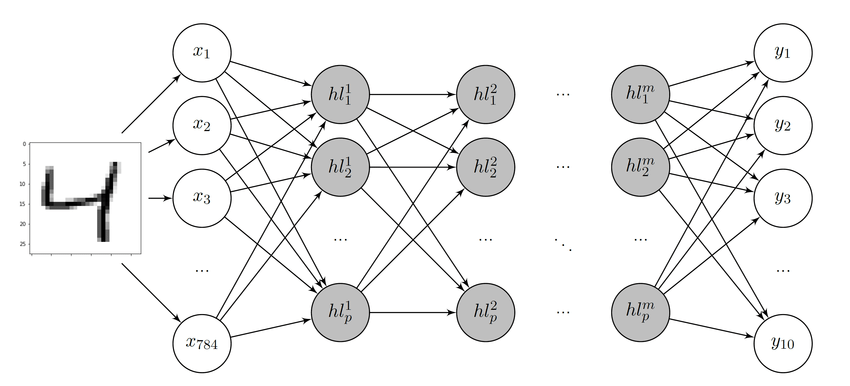

#### Ajuste de hiperparámetros
Para ejecutar la optimización, es necesario implementar la creación de una estructura NN de manera que los parámetros de interés puedan variarse automáticamente. Los parámetros de interés son los siguientes:
- *learning rate*: controla cuánto ajustar los pesos del modelo con respecto al gradiente de pérdida, típicamente 1e-5, 1e-1.
- *número de unidades (neuronas) en la capa 1*: indica el número de neuronas en la capa, los valores típicos son 16, 32, 64, 128 y 256.
- *número de unidades (neuronas) en la capa 2*: indica el número de neuronas en la capa, los valores típicos son 16, 32, 64, 128 y 256.
- *l2_reg: el regularizador del núcleo*: agrega una penalización a la función de pérdida para pesos grandes, lo que alienta al modelo a encontrar pesos más pequeños, típicamente 1e-6, 1e-2.
- *batch_size*: el tamaño del lote es la cantidad de imágenes analizadas en una ejecución, generalmente 16, 32, 64, 128.

La función *build_model()* construye un modelo secuencial NN. Primero, se agrega la función *Flatten()* que toma la entrada de la matriz n x m y la convierte en un vector a de n*n elementos. Las siguientes dos capas son las capas ocultas y la capa de salida contiene 10 neuronas, cada una para un número. Los parámetros de entrada de la función son los parámetros de interés.


In [6]:
# define the model as objective function()
def build_model(learning_rate, units_layer01,units_layer02, l2_reg):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(units=units_layer01, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(units=units_layer02, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(units=10, activation='softmax'))
    return model

La función *model_score()* recibe una lista con el parámetro de interés y llama a la función *build_model()*. El modelo NN se parametriza con las diferentes variaciones de los parámetros de interés, se compila y ajusta con los datos de entrenamiento y se valida con los datos de validación. El tamaño del lote también varía. Como criterio, se selecciona y almacena el error cuadrático medio (mse).\ Además, se recomienda incluir *callbacks* durante el proceso de ajuste. En este caso, se implementan *EarlyStopping* y *ModelCheckpoints*. *EarlyStopping* monitorea la métrica, en este caso el **mse** y se detiene antes si se alcanza un valor definido. Esto evita el sobreajuste. *ModelCheckpoints* almacena los mejores valores del parámetro de interés para cada época.

In [7]:
def model_score(params):
    learning_rate = float(params[:, 0])
    units_layer01 = int(params[:, 1])
    units_layer02 = int(params[:, 2])
    l2_reg = float(params[:, 3])
    batch_size = int(params[:, 4])

    model = build_model(learning_rate, units_layer01,units_layer02,  l2_reg)
    #model.summary()
    checkpoint_folder = "checkpoints/"
    checkpoint_path = checkpoint_folder +  f'checkpoint_lr_{learning_rate}_units_layer01_{units_layer01}_units_layer02_{units_layer02}_l2_{l2_reg}_batch_{batch_size}.keras' #h5
    callbacks = [
        EarlyStopping(monitor='val_mse', patience=15, restore_best_weights=True),
        ModelCheckpoint(checkpoint_path, monitor='val_mse', save_best_only=True, verbose=1)
    ]
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['mse'])
    
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        batch_size=batch_size,
                        epochs=50,
                        callbacks=callbacks,
                        verbose=0)
    
    val_mse = np.max(history.history['val_mse'])
    return -val_mse


**Optimización Bayesiana (MNIST)**
Para ejecutar el optimizador, se deben definir los parámetros de interés y su rango. En este caso se utilizan los valores típicos mencionados anteriormente. Una vez definidos los parámetros, se utiliza el método de Optimización Bayesiana de GPyOpt para ejecutar el modelo dentro de los rangos de parámetros definidos llamando a la función *model_score*. El tipo de adquisición se define como "Expected Improvement" (EI).

In [8]:
# Define the bounds of the hyperparameters
bounds = [
    {'name': 'learning_rate', 'type': 'continuous', 'domain': (1e-5, 1e-1)},
    {'name': 'units_layer01', 'type': 'discrete', 'domain': (16, 32, 64, 128, 256)},
    {'name': 'units_layer02', 'type': 'discrete', 'domain': (16, 32, 64, 128, 256)},
    {'name': 'l2_reg', 'type': 'continuous', 'domain': (1e-6, 1e-2)},
    {'name': 'batch_size', 'type': 'discrete', 'domain': (16, 32, 64, 128)}
]

# Perform Bayesian Optimization
optimizer = GPyOpt.methods.BayesianOptimization(f=model_score, 
                                                domain=bounds, 
                                                acquisition_type='EI'  # Expected Improvement
)



Epoch 1: val_mse improved from inf to 0.04034, saving model to checkpoints/checkpoint_lr_0.029036572982583657_units_layer01_16_units_layer02_16_l2_0.006881018995509859_batch_16.keras

Epoch 2: val_mse improved from 0.04034 to 0.03079, saving model to checkpoints/checkpoint_lr_0.029036572982583657_units_layer01_16_units_layer02_16_l2_0.006881018995509859_batch_16.keras

Epoch 3: val_mse improved from 0.03079 to 0.02828, saving model to checkpoints/checkpoint_lr_0.029036572982583657_units_layer01_16_units_layer02_16_l2_0.006881018995509859_batch_16.keras

Epoch 4: val_mse did not improve from 0.02828

Epoch 5: val_mse did not improve from 0.02828

Epoch 6: val_mse did not improve from 0.02828

Epoch 7: val_mse did not improve from 0.02828

Epoch 8: val_mse did not improve from 0.02828

Epoch 9: val_mse did not improve from 0.02828

Epoch 10: val_mse did not improve from 0.02828

Epoch 11: val_mse did not improve from 0.02828

Epoch 12: val_mse did not improve from 0.02828

Epoch 13: val

Ahora se inicia la optimización con un número máximo de ejecuciones. En este caso, 35.

In [ ]:
optimizer.run_optimization(max_iter=30, verbosity=True, eps=1e-6)


Epoch 1: val_mse improved from inf to 0.07591, saving model to checkpoints/checkpoint_lr_1e-05_units_layer01_16_units_layer02_128_l2_1e-06_batch_16.keras

Epoch 2: val_mse improved from 0.07591 to 0.04898, saving model to checkpoints/checkpoint_lr_1e-05_units_layer01_16_units_layer02_128_l2_1e-06_batch_16.keras

Epoch 3: val_mse improved from 0.04898 to 0.03355, saving model to checkpoints/checkpoint_lr_1e-05_units_layer01_16_units_layer02_128_l2_1e-06_batch_16.keras

Epoch 4: val_mse improved from 0.03355 to 0.02608, saving model to checkpoints/checkpoint_lr_1e-05_units_layer01_16_units_layer02_128_l2_1e-06_batch_16.keras

Epoch 5: val_mse improved from 0.02608 to 0.02193, saving model to checkpoints/checkpoint_lr_1e-05_units_layer01_16_units_layer02_128_l2_1e-06_batch_16.keras

Epoch 6: val_mse improved from 0.02193 to 0.01943, saving model to checkpoints/checkpoint_lr_1e-05_units_layer01_16_units_layer02_128_l2_1e-06_batch_16.keras

Epoch 7: val_mse improved from 0.01943 to 0.01781

La siguiente figura muestra los resultados de **mse**. Están ordenados del peor al mejor y cada punto de valor contiene el número de ejecución para identificar los parámetros utilizados para obtener el valor.
Se selecciona el mejor modelo y se imprimen sus características.

16


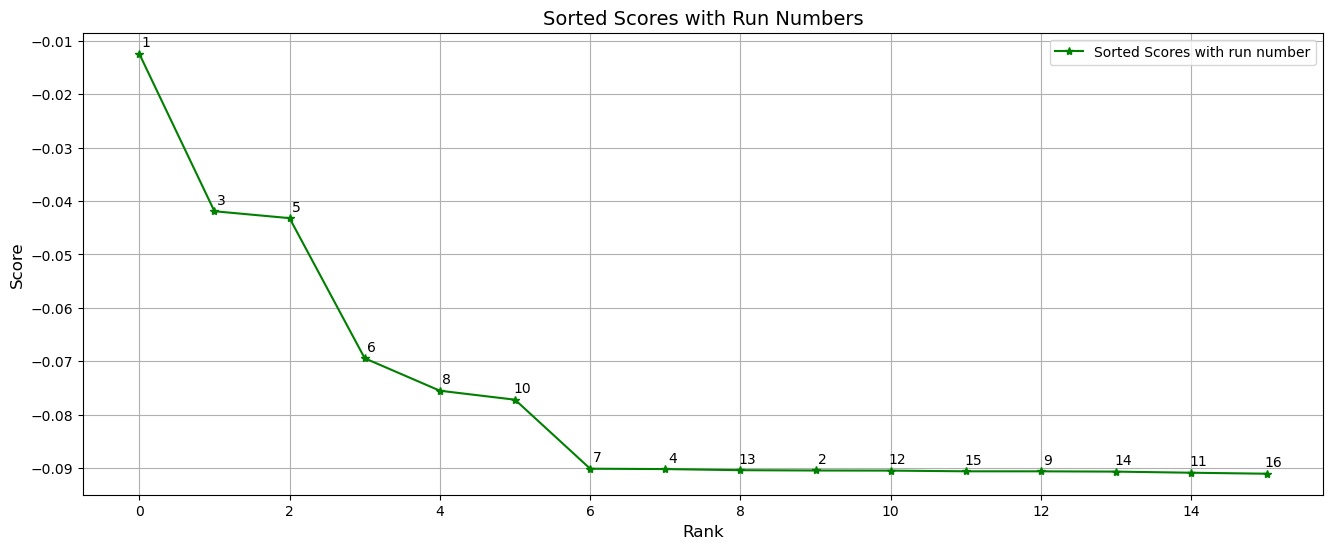

In [ ]:
# Assuming optimizer.X and optimizer.Y are already defined
opt_res_param = optimizer.X
print(len(opt_res_param))
opt_res_score = optimizer.Y
opt_res_score = opt_res_score.flatten()

# Sort scores and retain original indices
original_indices = np.argsort(opt_res_score)[::-1]  # Indices for descending order
opt_res_score_sorted = opt_res_score[original_indices]
idx_opt_value = original_indices[len(original_indices)-1]


# Create N array (1 to len(opt_res_score_sorted))
N = np.arange(0, len(opt_res_score_sorted) )

# Set up the figure size
plt.figure(figsize=(16, 6))  # Width: 10 inches, Height: 6 inches

# Plot scores
plt.plot(N, opt_res_score_sorted, 'g*-', label="Sorted Scores with run number")  # Add a label for the legend
plt.grid()

# Annotate with original run numbers
for i, idx in enumerate(original_indices):
    plt.annotate(f"{idx+1}", (N[i], opt_res_score_sorted[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# Add labels, title, and legend
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Sorted Scores with Run Numbers", fontsize=14)
plt.legend(loc="upper right", fontsize=10)  # Add a legend at the top right

# Show the plot
plt.show()

In [ ]:
optimizer.plot_acquisition()

In [ ]:
from tensorflow.keras.models import load_model
import os
import re

# 
folder_path = "checkpoints/"
opt_models = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
opt_models_sorted = sorted(opt_models , key=os.path.getctime, reverse=True)
opt_idx_model = original_indices[len(opt_models_sorted) - len(original_indices)-1]
best_fitting_model_file = opt_models_sorted[len(original_indices)-idx_opt_value-1]
#
model = load_model(best_fitting_model_file)
print(' best fitting model: ')
print(best_fitting_model_file)
# Inspect the model
model.summary()


# read learning rate (lr), regulator 2 and batch size

# Regular expressions for lr, l2, and batch
lr_match = re.search(r"lr_([0-9.]+)", best_fitting_model_file)
l2_match = re.search(r"l2_([0-9.]+)", best_fitting_model_file)
batch_match = re.search(r"batch_([0-9]+)", best_fitting_model_file)

# Extract values
lr = float(lr_match.group(1)) if lr_match else None
l2 = float(l2_match.group(1)) if l2_match else None
batch = int(batch_match.group(1)) if batch_match else None

# Print the results
print(f"Learning Rate (lr): {lr}")
print(f"L2 Regularization (l2): {l2}")
print(f"Batch Size (batch): {batch}")


 best fitting model: 
checkpoints/checkpoint_lr_0.1_units_layer01_16_units_layer02_128_l2_1e-06_batch_16.keras


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,080 (187.82 KB)

 Trainable params: 16,026 (62.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,054 (125.21 KB)

Learning Rate (lr): 0.1
L2 Regularization (l2): 1.0
Batch Size (batch): 16


https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html\
https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html#sphx-glr-auto-examples-bayesian-optimization-py\
https://www.linkedin.com/pulse/optimizing-machine-learning-models-bayesian-deep-dive-davis-joseph-qsqje?utm_source=share&utm_medium=member_android&utm_campaign=share_via